In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree # importa a arvore de decisão
from sklearn import tree # importa a função tree para plotar a arvore
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
df = pd.read_csv('dadosacoes.csv')

In [17]:
df.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [18]:
nome = df['nome ação']
preço = df['preço ação R$']
mercado = df['valor de mercado R$ -(Bilhões)']

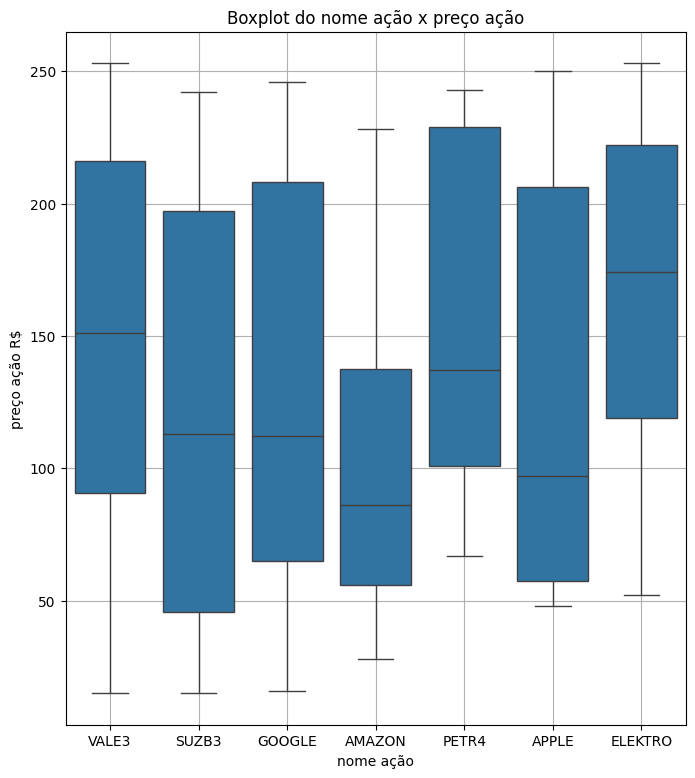

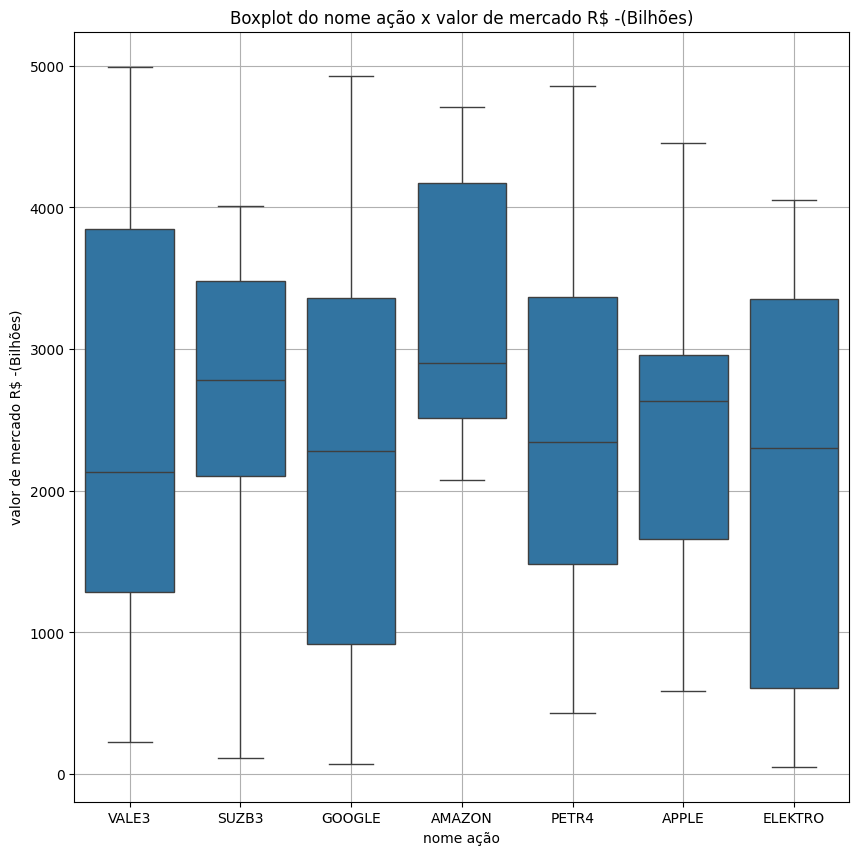

In [22]:
plt.figure(figsize=(8,9))
plt.title('Boxplot do nome ação x preço ação')
sns.boxplot(x = nome, y = preço )
plt.grid()


plt.figure(figsize=(10,10))
plt.title('Boxplot do nome ação x valor de mercado R$ -(Bilhões)')
sns.boxplot(x = nome, y = mercado )
plt.grid()



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [24]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [25]:
df_processed = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

In [26]:
print(df_processed)

    preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
0             194          45                            2134   
1              91          71                            3069   
2             165          41                            2815   
3              56          34                            3613   
4             212           9                            2975   
..            ...         ...                             ...   
95            208          78                            3035   
96            253          60                            3263   
97             99          35                             980   
98             82          43                            1866   
99            111          19                             230   

    nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  nome ação_PETR4  \
0             False              False             False            False   
1             False              False             False         

In [57]:
dados = df_processed[['preço ação R$', 'valor de mercado R$ -(Bilhões)']]



In [58]:
dados

,preço ação R$,valor de mercado R$ -(Bilhões)
0,194,2134
1,91,3069
2,165,2815
3,56,3613
4,212,2975
...,...,...
95,208,3035
96,253,3263
97,99,980
98,82,1866


In [59]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=4) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans(n_clusters=4)

In [60]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  13870232.843772888


In [61]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

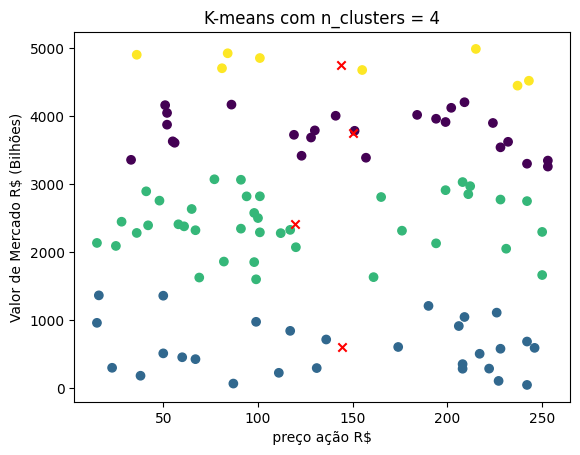

In [68]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels) # Correção: acessando colunas pelo nome
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 4')
plt.show()


In [69]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=5) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans(n_clusters=5)

In [71]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  8926467.71586466


In [72]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

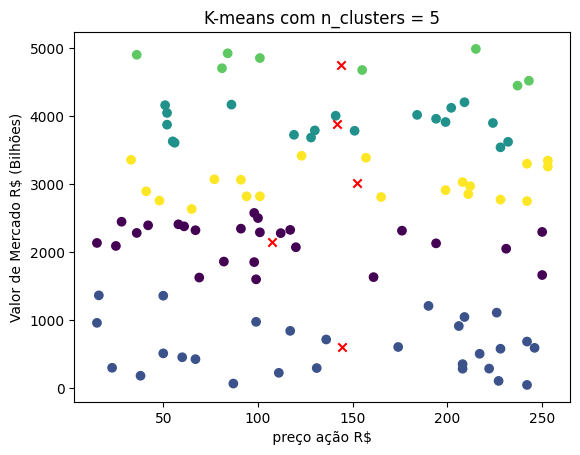

In [73]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels) # Correção: acessando colunas pelo nome
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 5')
plt.show()

# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [74]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=8) # armazena na variavel o modelo kmeans
kmeans.fit(dados) # cria o modelo kmeans

KMeans()

In [75]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  3048894.2171936263


In [76]:
# Visualizando os resultados dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

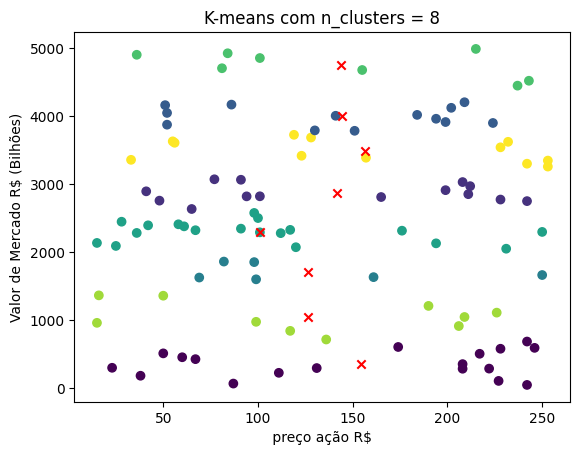

In [122]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados['preço ação R$'], dados['valor de mercado R$ -(Bilhões)'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel(' preço ação R$ ')
plt.ylabel('Valor de Mercado R$ (Bilhões)')
plt.title('K-means com n_clusters = 8')
plt.show()

In [81]:
from sklearn.metrics import silhouette_score


In [82]:
silhouette_score(dados, kmeans.predict(dados))


0.5502438301285847

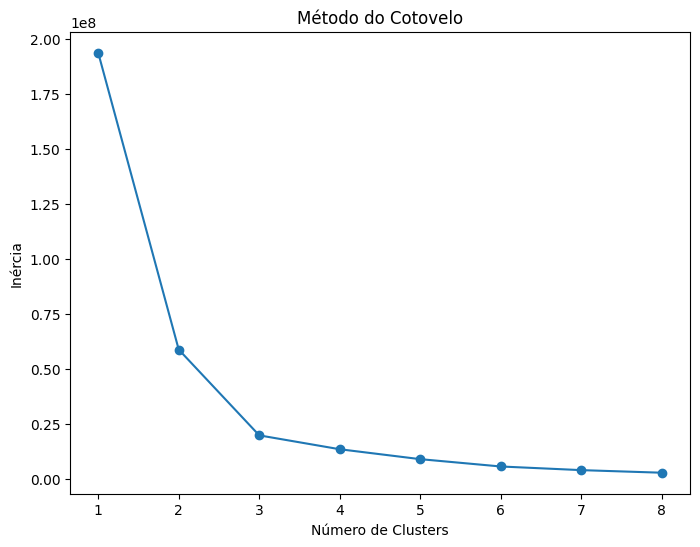

In [116]:
# Método do Cotovelo para encontrar o número ideal de clusters
inercia = []
for n in range(1, 9):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(dados)
    inercia.append(kmeans.inertia_)

# Exibindo o gráfico
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


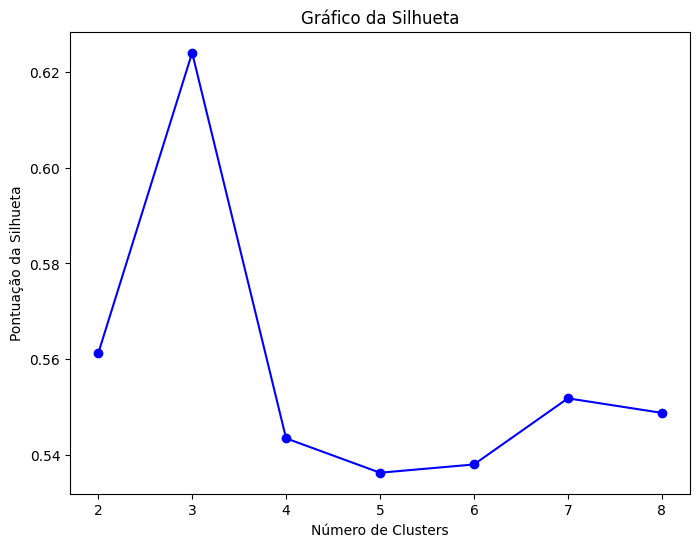

In [117]:
silhouette_scores = []
for n in range(2, 9):  # A silhueta não é definida para 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(dados)
    silhouette_avg = silhouette_score(dados, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Exibindo o gráfico da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o', color='b')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()

<ipython-input-127-851227f4aed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Cluster_4'] = labels


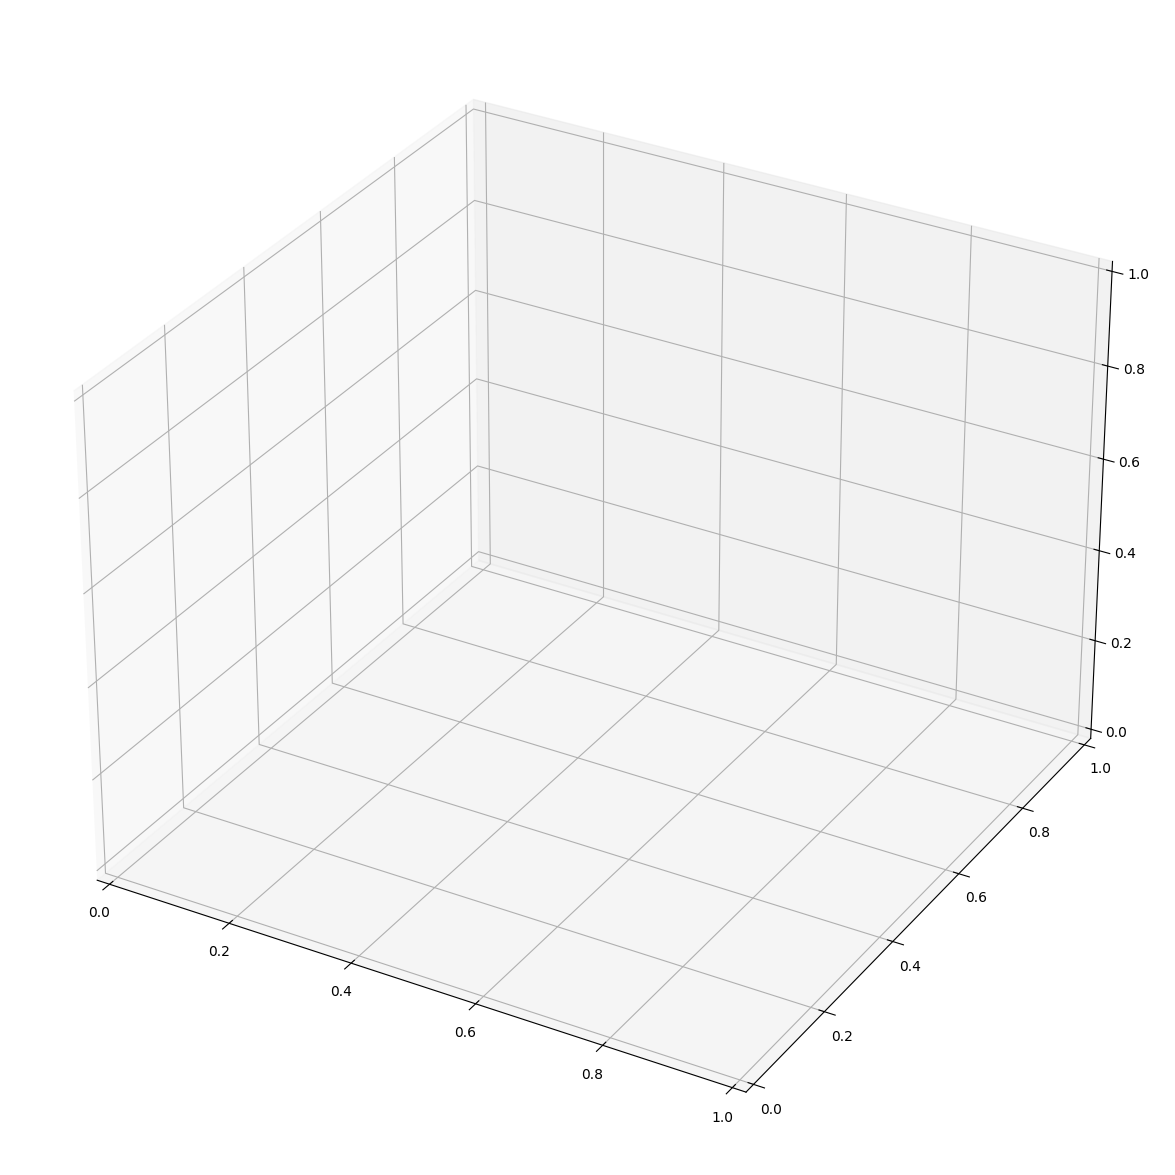

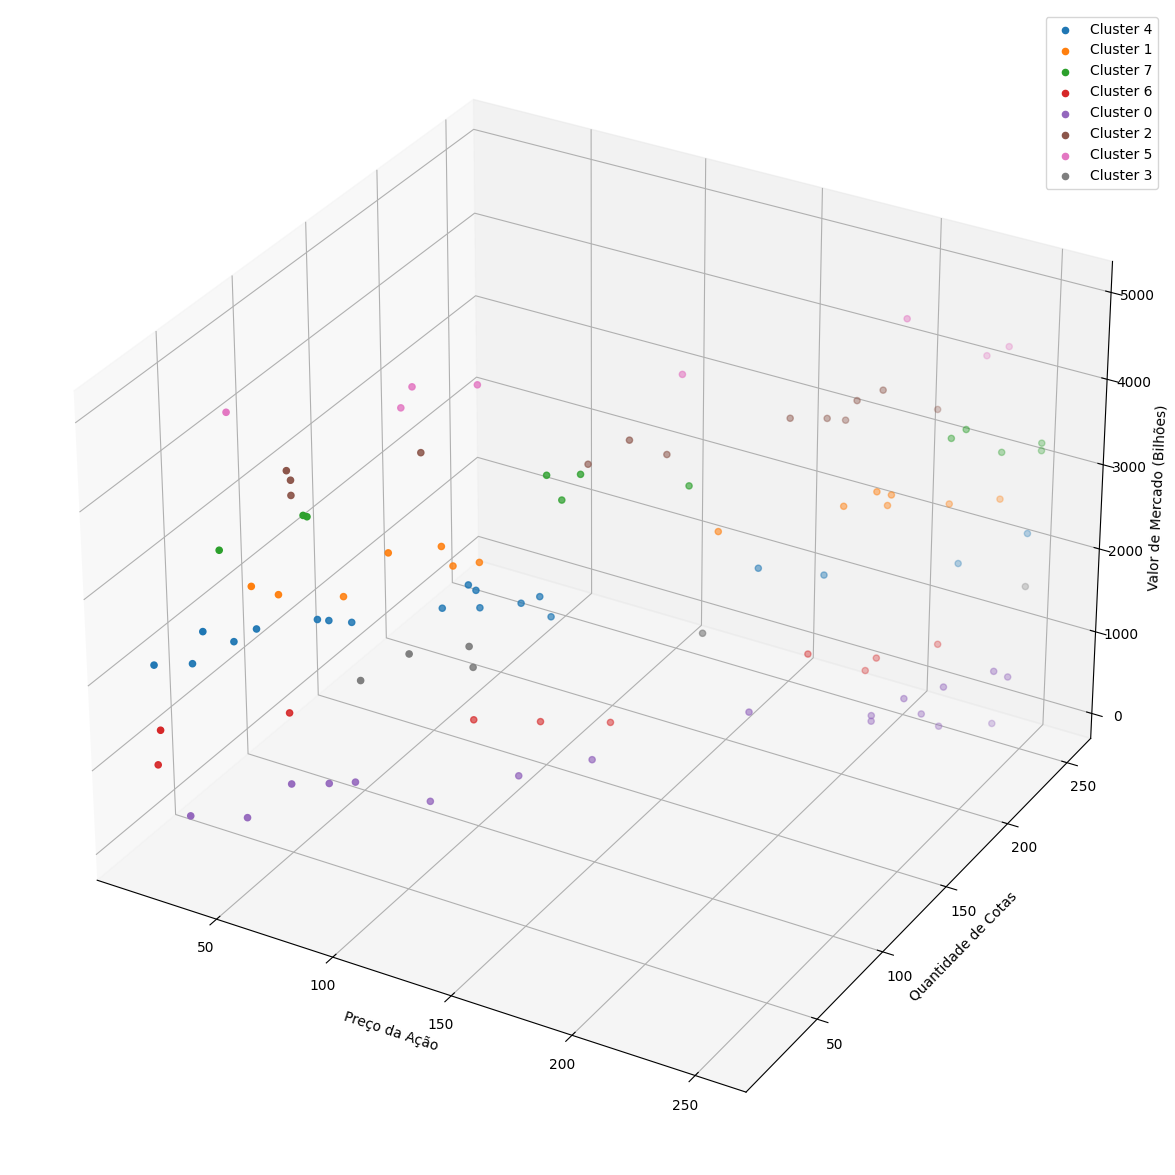

In [ ]:
dados['Cluster_4'] = labels

# Plotando o gráfico 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtendo os clusters únicos
clusters = dados['Cluster_4'].unique()  # Corrigido: acessando a coluna 'Cluster_4'



fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Obtendo os clusters únicos
clusters = dados['Cluster_4'].unique()

# Iterando e plotando os clusters com cores distintas
for i, cluster in enumerate(clusters):
    cluster_data = dados[dados['Cluster_4'] == cluster]
    ax.scatter(cluster_data['preço ação R$'],
               cluster_data['preço ação R$'],
               cluster_data['valor de mercado R$ -(Bilh ões)'],
               label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10))

# Títulos e rótulos
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')

# Legenda
plt.legend()

# Exibindo o gráfico
plt.show()


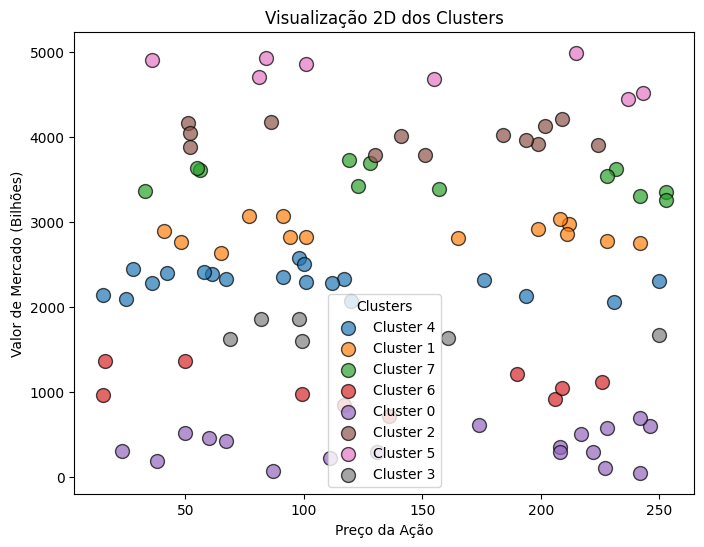

In [129]:
plt.figure(figsize=(8, 6))

# Atribuindo cores aos clusters
for i, cluster in enumerate(dados['Cluster_4'].unique()):
    cluster_data = dados[dados['Cluster_4'] == cluster]

    # Gerando uma cor para cada cluster com plt.cm.tab10
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'],
                label=f'Cluster {cluster}', color=plt.cm.tab10(i % 10), s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


In [ ]:
5) Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?

A principal vantagem do aprendizado não supervisionado é que ele pode descobrir padrões e
estruturas em dados não rotulados, sem precisar de supervisão. Isso é útil em situações onde
rotular dados é difícil ou caro. Já o aprendizado supervisionado exige rótulos e é focado em
previsões específicas.